In [74]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import math
import logging
from tensorflow import keras
from keras.layers import Dense, SimpleRNN

In [75]:
log = tf.get_logger()
log.setLevel(logging.ERROR)

In [76]:
time = np.array([92534400,
    242265600,
    624672000,
    1244419200,
    1539993600,
    1596067200,
    1714521600,
])
speed = np.array([1277.997759,
1106.938346,
3019.28,
3133.160588,
3510.152863,
3390.350877,
3683.833333,
])

In [86]:
model = tf.keras.Sequential([tf.keras.layers.Dense(16, input_shape=[1], activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(16, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(16, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(8, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1)
                             ])
model.compile(tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.mean_squared_error)

In [87]:
history = model.fit(time, speed, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 628ms/step - loss: 61.3569
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 61.3569
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 61.3569
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 61.3569
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 61.3569
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 61.3569
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 61.3569
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 61.3569
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 61.3569
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 61.3569
Epoch 11/1000
1/1 [==============================] - 0s 8ms/step - loss: 61.3569
Epoch 12/1000
1/1 [==============================] - 0s 6ms/step - loss: 61.3569
Epoch 13/1000
1/1 [================

In [88]:
time_2030 = np.array([1893459661])
speed_2030 = model.predict(time_2030)
print(speed_2030)

1/1 [==============================] - 0s 107ms/step
[[-31497368.]]


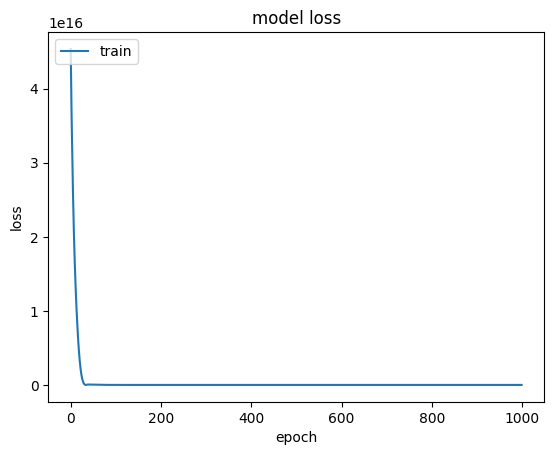

In [85]:
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

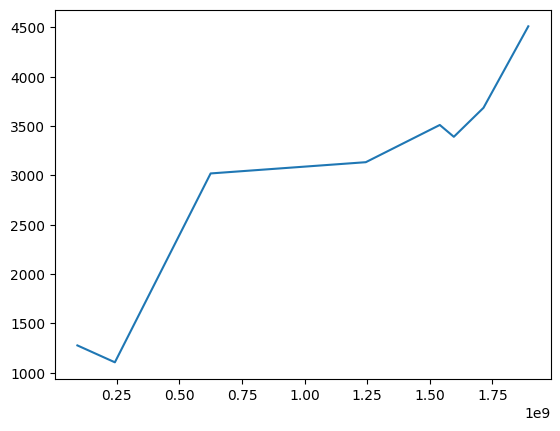

In [81]:
plt.plot(np.append(time, time_2030), np.append(speed, speed_2030))